In [28]:
# 군집...비지도 학습
! pip install wget

In [29]:
import wget
url = 'http://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
fruits = np.load('fruits_300_data')
# 이미지 샘플을 넘파이 배열로 변환을 해 줌

In [32]:
fruits.shape, type(fruits) # (샘플수, 가로, 세로)

((300, 100, 100), numpy.ndarray)

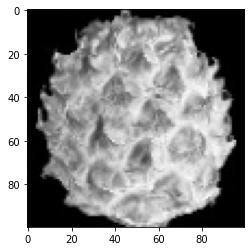

In [33]:
# 2차원 평면 이미지가 가로 10, 세로 10인 300개의 샘플수
plt.imshow(fruits[100], cmap='gray') # cmap : 흑백 이미지 표현
plt.show() # <matplotlib.image.AxesImage at 0x24375baa130> <-- 사라짐

In [34]:
# 시각화 할 때 여러 개로 분할하여 보여주는 도구 --> subplot

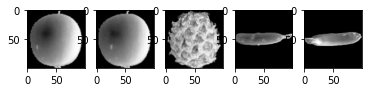

In [35]:
fig, axs = plt.subplots(1,5)
axs[0].imshow(fruits[0], cmap='gray')
axs[1].imshow(fruits[10], cmap='gray')
axs[2].imshow(fruits[100], cmap='gray')
axs[3].imshow(fruits[200], cmap='gray')
axs[4].imshow(fruits[250], cmap='gray')
plt.show()

In [36]:
# 픽셀값 조정해 보기
fruits[0,0,:], fruits[0,:,0] # 샘플수, 길이, 높이가 어떻게 표현되었는지 보여줌

(array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
          1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
          1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
          5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
          1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 2, 3, 1, 2, 3,
        1, 1, 1, 2, 2, 2, 5, 2, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8))

In [37]:
len(fruits[0,0,:]), len(fruits[0,:,0])

(100, 100)

In [38]:
# 300, 100, 100 의 값을 가진 이미지
# 위 이미지를 1차원 배열로 변환 --> 100*100인 300개의 이미지를 10000인 1차원 넘파이 배열로 하나의 이미지로 만들기

# 이미지 하나를 1차원 배열로 변환할 때는,
fruits[0].reshape(-1, 100*100)
# row는 자동정렬, column값은 100*100

array([[1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [39]:
# 사과, 파인애플, 바나나 각각 100*100인 이미지별로 묶어서 1차원 배열 구성하기
# 0~100 : 사과
# 100~200 : 파인애플
# 200~300 : 바나나

# 가로 세로 100*100씩 가진 300의 이미지별로 변수에 담기
apple = fruits[0:100].reshape(-1, 100*100) # 사과
fineApple = fruits[100:200].reshape(-1, 100*100) # 파인애플
banana = fruits[200:300].reshape(-1, 100*100) # 바나나
# row값은 100개씩 해 주어도 되고, 어차피 100씩 자동 분할될 것이기 때문에 -1을 주어도 됨

In [40]:
apple.shape, fineApple.shape, banana.shape # 2차원 배열 구성

((100, 10000), (100, 10000), (100, 10000))

In [41]:
# 이미지(과일) 특성을 알아보기 위해 픽셀 분석하기
# 각 과일의 픽셀 평균값을 계산
type(apple) # 넘파이 형식의 파일
apple.mean(axis=1), fineApple.mean(axis=1), banana.mean(axis=1)
# 픽셀값이 다 다른 이유는 각각의 이미지를 구성하는 픽셀의 크기가 다 다르기 때문임

(array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
         94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
         93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
         92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
         94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
         90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
        100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
         87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
         96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
         89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
        103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
         91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
         82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
         98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
         88.7301,  86.643 ,  96.7323,  97.2604, 

# 시각화

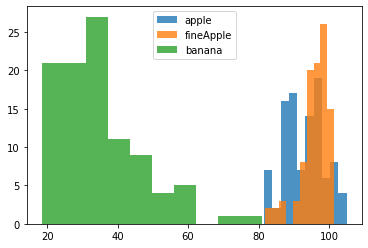

In [42]:
# 이처럼 분석할 데이터가 많을 때 시각화는 필수 !
# 히스토그램 그려보기 (얼마나 독립적인 값을 가졌는지, 혹은 얼마나 유사한 값을 가졌는지)
plt.hist(apple.mean(axis=1), alpha=0.8) # alpha : 투명도 (겹치는 부분이 보이게끔 0.8의 값 준 것)
plt.hist(fineApple.mean(axis=1), alpha=0.8)
plt.hist(banana.mean(axis=1), alpha=0.8)
plt.legend(['apple','fineApple','banana'])
# 사과와 파인애플은 겹치는 부분이 상당 부분 있음
# 이처럼 유사한 이미지끼리의 데이터의 숫자값 역시 유사하므로 구간이 겹침

In [43]:
# 제공된 이미지 중에 바나나와 나머지들은 구분이 가능한 이미지임을 알 수 있음
# 사과, 파인애플은 서로 겹치는 구간이 많은 것을 보고 서로 이미지가 비슷하다는 것을 알 수 있음

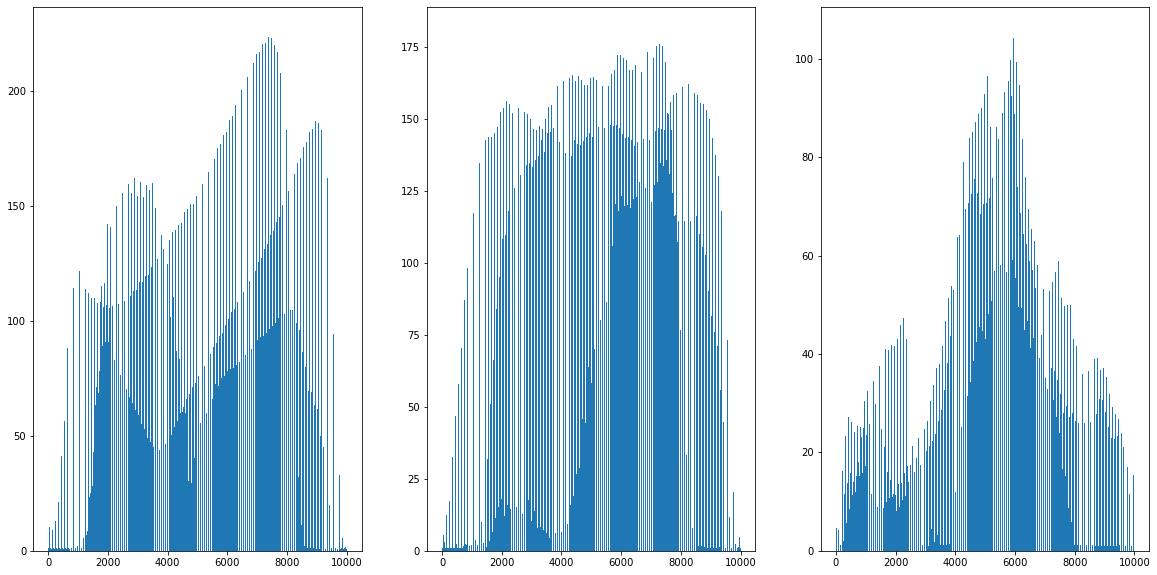

In [44]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), fineApple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

# 굵게 칠해진 곳은 값이 중복된다는 것을 의미 --> 투명도를 낮게 준 이유 (겹칠수록 진하게 표현)

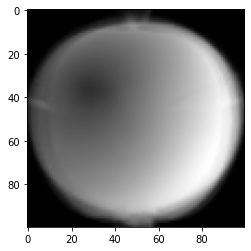

In [45]:
# 출력된 각각의 이미지들의 모든 값의 평균 내 보기
# 사과
plt.imshow(apple.mean(axis=0).reshape(100,100), cmap='gray')
plt.show()

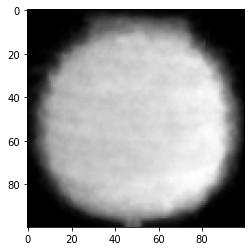

In [46]:
# 파인애플
plt.imshow(fineApple.mean(axis=0).reshape(100,100), cmap='gray')
plt.show()

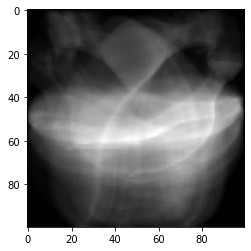

In [47]:
# 바나나
plt.imshow(banana.mean(axis=0).reshape(100,100), cmap='gray')
plt.show()

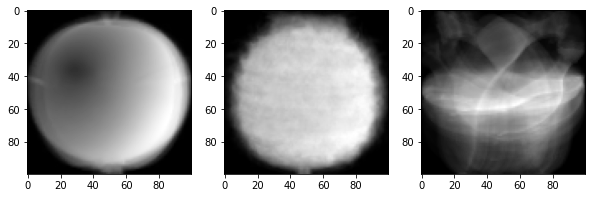

In [48]:
fig, axs = plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(apple.mean(axis=0).reshape(100,100), cmap='gray')
axs[1].imshow(fineApple.mean(axis=0).reshape(100,100), cmap='gray')
axs[2].imshow(banana.mean(axis=0).reshape(100,100), cmap='gray')
plt.show()

In [49]:
# 평균값과 가장 가까운 사진 고르기 - 평균제곱오차 MSE 사용 (sklearn)
# 각 픽셀의 실제값과 각 평균값의 오차가 가장 작은 값 찾기
# 절대값 오차 (어느 값이 더 큰지 모르는 상황에, 편차가 작은 값을 구해야 하는 것, 즉 양수/음수 상관없이 오차를 발견해야 하므로 절대값으로 구해주어야 함)
appleMean = apple.mean(axis=0).reshape(100,100)
fineAppleMean = fineApple.mean(axis=0).reshape(100,100)
bananaMean = banana.mean(axis=0).reshape(100,100)

fruits.shape, appleMean.shape, fineAppleMean.shape, bananaMean.shape

((300, 100, 100), (100, 100), (100, 100), (100, 100))

In [50]:
'''
# 전체와 사과의 거리의 절댓값
app_diff = np.abs(fruits - appleMean)
# np.mean(diff) X --> 값 전체의 평균 하나를 반환하므로 옳지 않음, 각 샘플에 대한 (사과, 파인애플, 바나나 별로) 평균을 구해주어야 함 
# 전체와 사과의 거리의 절댓값의 평균
app_diff_mean = np.mean(diff, axis=(1,2)) #  배열 차수 : 0 / raw : 1 / column : 2 --> 300, 100, 100 라면 100, 100를 하나의 데이터로 사용한다는 것
diff_mean.shape # 100 by 100 전체의 평균데이터값을 구했으므로 1차원 배열로 변환됨

# 파인애플
fineApp_diff = np.abs(fruits - fineAppleMean)
fineApp_diff_mean = np.mean(diff, axis=(1,2))

# 바나나
banana_diff = np.abs(fruits - bananaMean)
banana_diff_mean = np.mean(diff, axis=(1,2))
'''

# 각각 대표이미지에 대한 평균 --> 오차가 가장 적은 값을 구해야 성공

# 위 내용 함수로 만들기
def diffMean(fruits, fruitsMean):
    diff = np.abs(fruits - fruitsMean)
    diff_mean = np.mean(diff, axis=(1,2))
    return diff_mean

app_diff_mean = diffMean(fruits, appleMean)
fineApp_diff_mean = diffMean(fruits, fineAppleMean)
banana_diff_mean = diffMean(fruits, bananaMean)

In [51]:
# 각각의 평균오차값이 작은 순으로 정렬된 인덱스값을 반환함

# 실제 비교하려는 이미지 [:100] -> 사과
#                        [100:200] -> 파인애플
#                        [200:300] -> 바나나

# 만약 사과를 기준으로 한다면 사과의 비교대상, 즉 파인애플, 바나나의 평균이미지값과 비교했을 때
# 사과의 평균값과 일치하는 값이 더 많다면 사과로 판단하여 사과를 반환하는 것

# def showCluster(diff_mean):
#     app_index = np.argsort(diff_mean)
#     real_index = np.where(app_index < 100) # 100개 추출
#     fig, axs = plt.subplots(10,10,  figsize=(10,10))
#     for i in range(10):
#         for j in range(10):
#             axs[i,j].imshow(fruits[real_index[i*10+j]], cmap='gray_r')
#             axs[i,j].axis('off')
#     plt.show()

# showCluster(app_diff_mean)
# showCluster(fineApp_diff_mean)
# showCluster(banana_diff_mean)

indexs = np.argsort(banana_diff_mean)
temp = np.where(indexs < 100)
temp = temp[0]


# temp[0]

# temp_list = temp.tolist()
# temp_list = list(temp)
# temp_list.tolist()


In [52]:
# diff_mean.sort() # 정렬 시 실제로 정렬된 값을 적용하기 때문에 원본데이터가 정렬된 상태로 변경돼버림 (원래 사과의 위치가 정렬 때문에흐트러짐)
# diff_mean[:50]

In [53]:
# np.argsort : 1차원 배열의 인덱스번호를 반환해 주는 함수
# - 정렬을 하나, 실제 인덱스를 흐트러뜨리지 않고 정렬된 인덱스를 그대로 반환해 줌
app_index = np.argsort(app_diff_mean)[:100]
app_index
# 33 -> 34번째로 비슷하다는 것을 의미

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

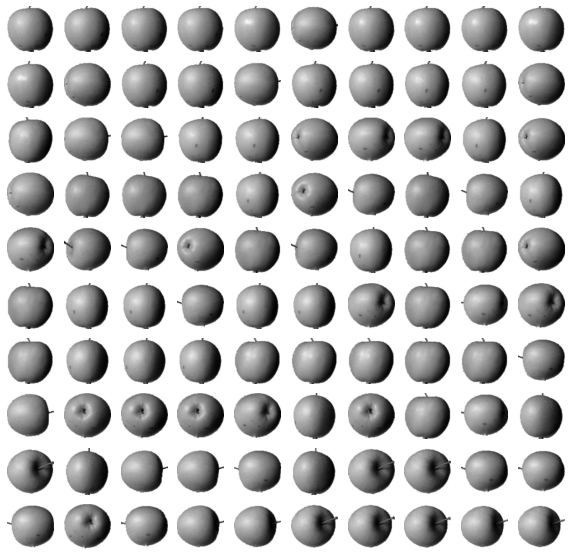

In [54]:
# fig, axs = plt.subplots(10,10,  figsize=(10,10))
# axs[0,0].imshow(fruits[app_index[0]], cmap='gray_r')
# axs[0,0].axis('off')
# axs[1,0].imshow(fruits[app_index[9]], cmap='gray_r')
# axs[1,0].axis('off')
# axs[2,0].imshow(fruits[app_index[9]], cmap='gray_r')
# axs[2,0].axis('off')
# axs[0.0].axis('off') --> 좌측 y값 가리기

fig, axs = plt.subplots(10,10,  figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[app_index[i*10+j]], cmap='gray_r')
        # 사과는 1차원 배열이므로 인덱스값 1개가 반환됨. 그러므로 axs의 j값이 1 올라갈 때 마다 사과의 j값도 함께 1 올라가야
        # 행, 열이 1씩 증가하면서 각각 다른 이미지를 출력하게 되는 것임
        # +j 를 안 해주면 i가 0으로 10번 돌 때 전부 인덱스값이 (0 * 10 = 0)이 되기 때문에 0번째 raw 모두 같은 이미지가 출력됨
        # 혹은 (1 * 10 = 10)이라고 해도 계속 10만 반환되는 것임
        # 따라서 +j를 안 해주게 되면 axs의 j값(열값)은 증가하는데 사과의 인덱스값은 똑같은 값만 반환하는 것
        axs[i,j].axis('off')
plt.show()

In [55]:
# 기존의 사과를 가지고 전체 평균을 구해서,
# 순서대로 되어 있는 데이터를 정렬했을 때의 위치값(인덱스값)을 구하고
# 즉 사과의 평균을 오름차순으로 정렬했을 때의 위치값을 반환한 것임 --> argsort()

# 실제이미지와 평균이미지를 뺀 오차값을 각 과일별로 100개씩 정렬한 것
# [:100] -> 전체에 대한 사과의 평균의 순위 (오차가 적은 순위)
# [100:200] -> 전체에 대한 파인애플의 평균의 순위
# [200:300] -> 전체에 대한 바나나의 평균의 순위

In [56]:
# subplot 사용 방법
# 1)
# plt.subplot(nrows,ncols,index)

# 2)
# if nrows = 3, ncols = 1, index = 2 -> 312
# plt.subplot(312)

# fig, axs --> fig -> 10 by 10 , axs -> 각 화면 객체를 제어할 수 있음 (2.0) <-- 2행에 그림 그리기 등

# list_a = [10,234,5,3,7,2,0]
# np.argsort(list_a)
# # 즉 argsort 메서드는 오름차순으로 인덱스값을 반환해 줌

In [57]:
# 결론 : 단순히 이미지의 평균값으로는 clustering 을 할 수 없음 (위 예시에서 사과의 값은 잘 나옴)

In [58]:
def showDetectImage(diff_mean):
    indexs = np.argsort(diff_mean)
    temp = np.where(indexs < 100)
    temp = temp[0]

    fig, axs =  plt.subplots(10,10, figsize=(10,10))
    for i in range(10):
        for j in range(10):
            axs[i,j].imshow(fruits[temp[i*10+j]], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

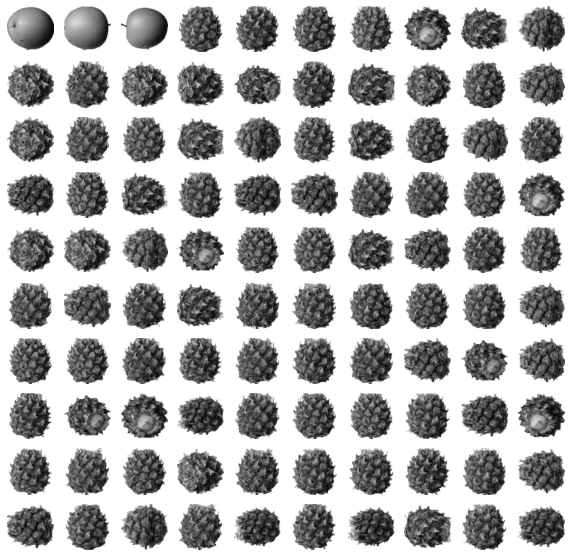

In [60]:
showDetectImage(fineApp_diff_mean)